<a href="https://colab.research.google.com/github/amilafr/algo-python-pro2/blob/main/M6L4_The_structure_of_a_database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The structure of a database

[PPT M6L4 ENG](https://docs.google.com/presentation/d/1mAwWUECg16mBkF9DcL8SNAuURg4Nlji1cBWhEo2Qodw/edit?usp=sharing)

# The structure of a database

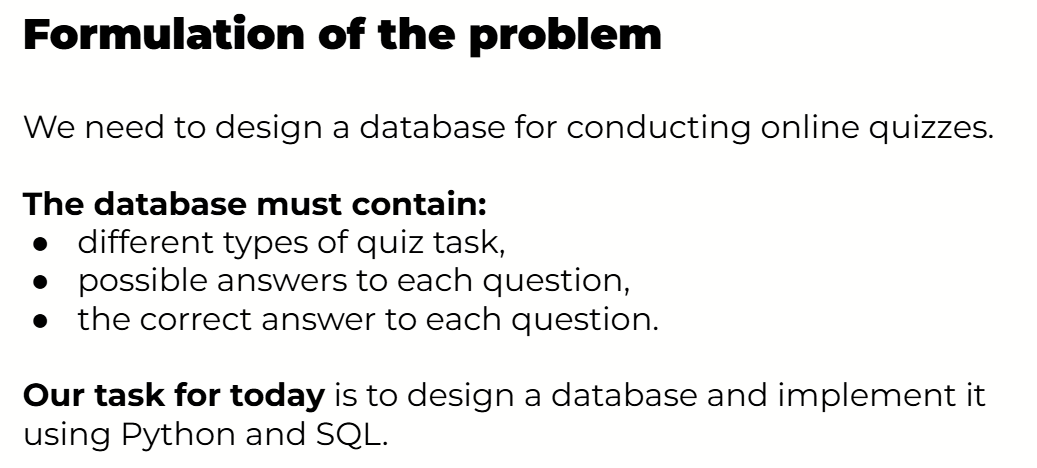

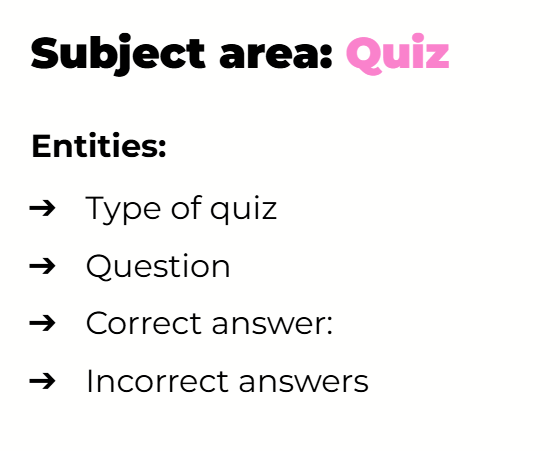

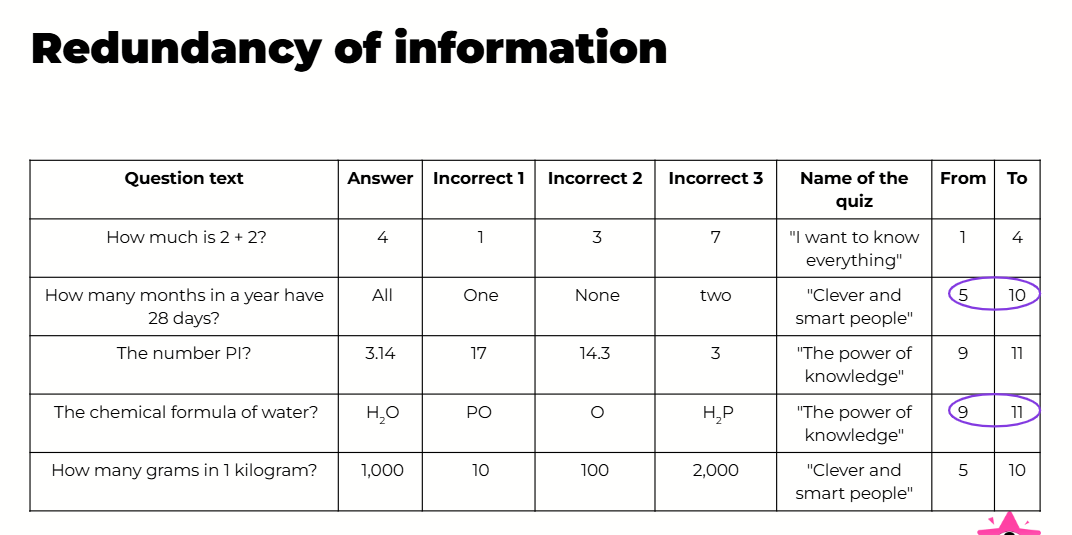

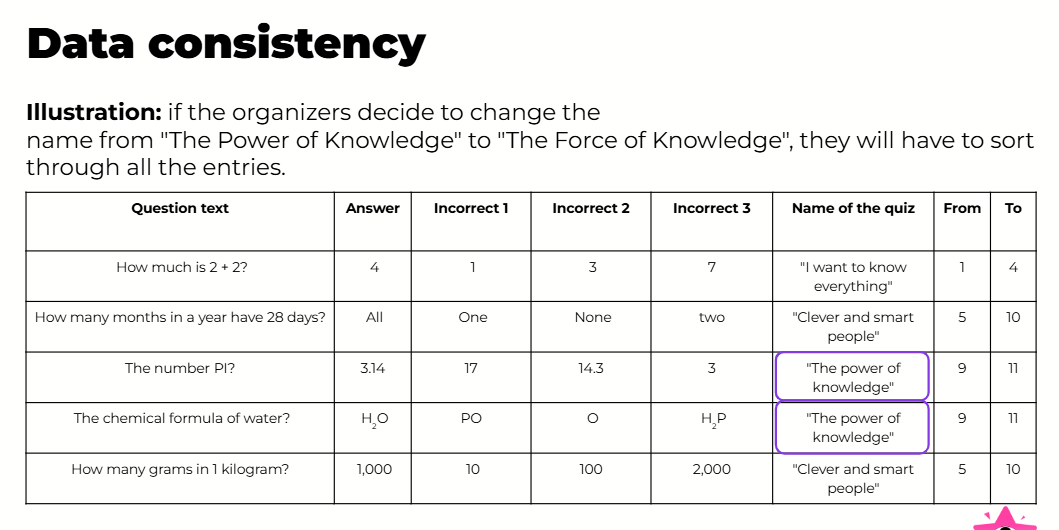

## solution

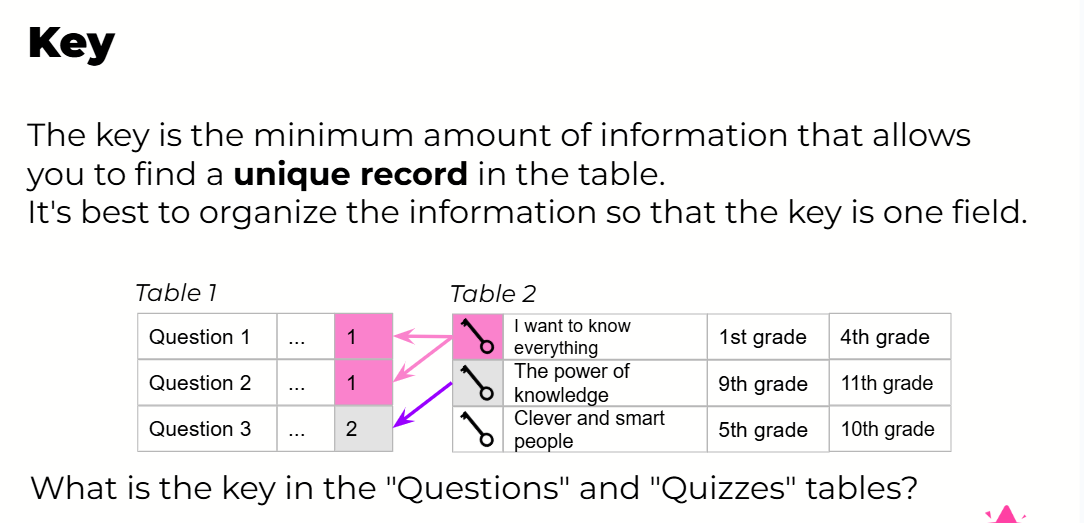

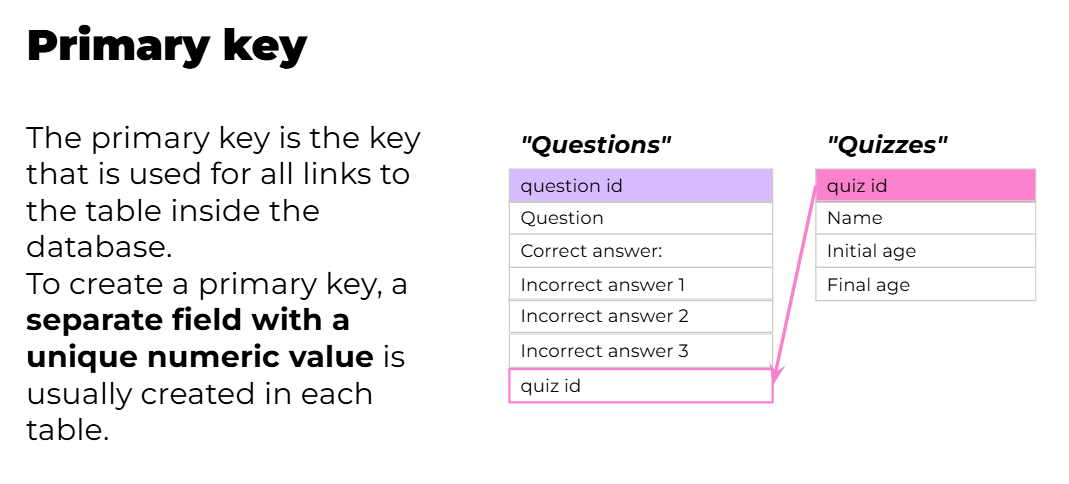

## connections

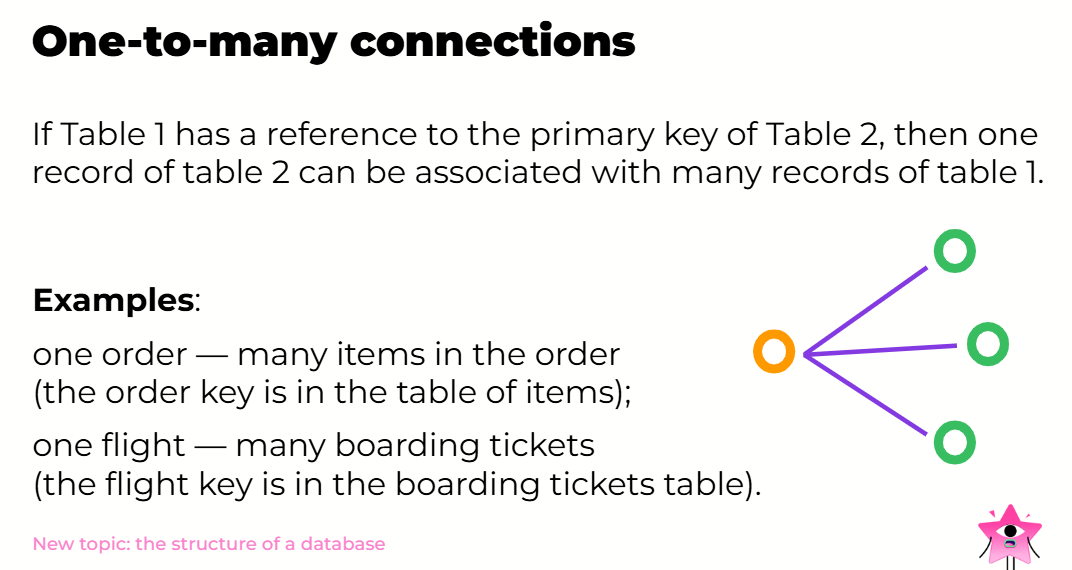

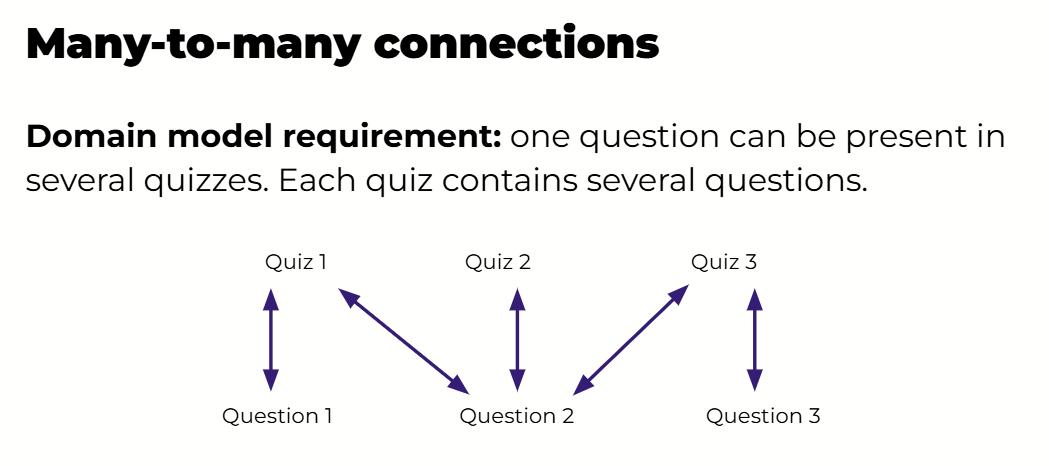

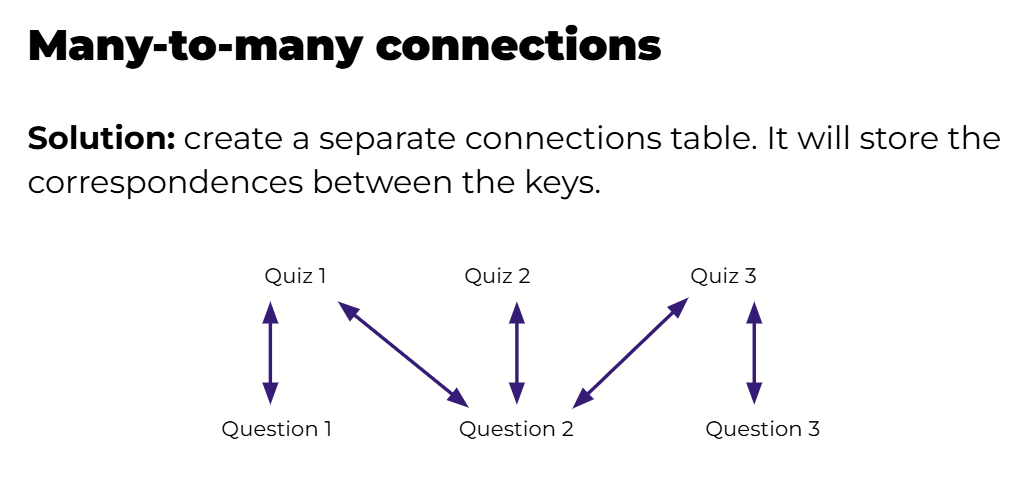

## create table with primary and foreign key

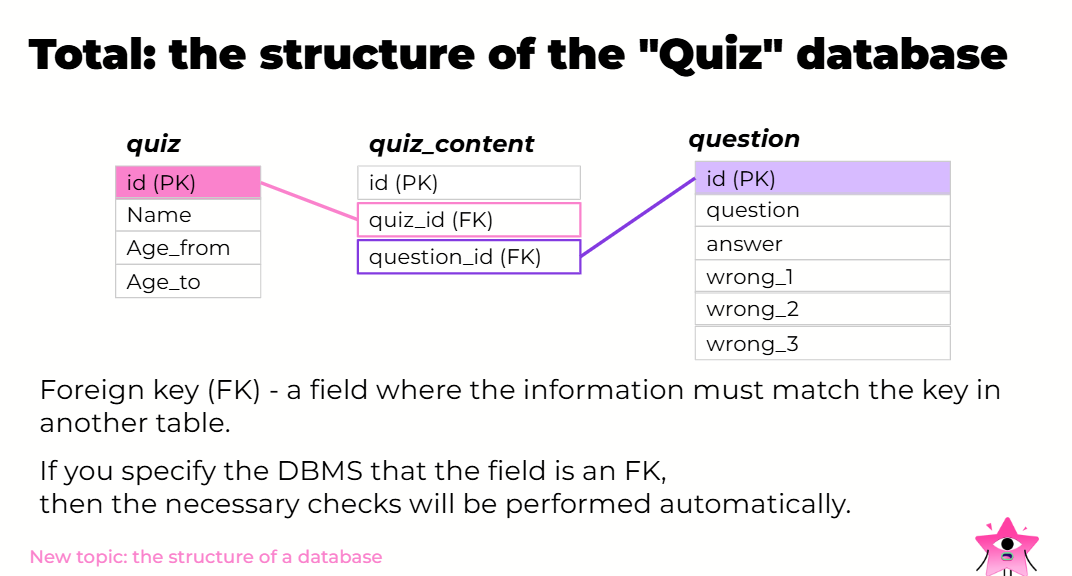

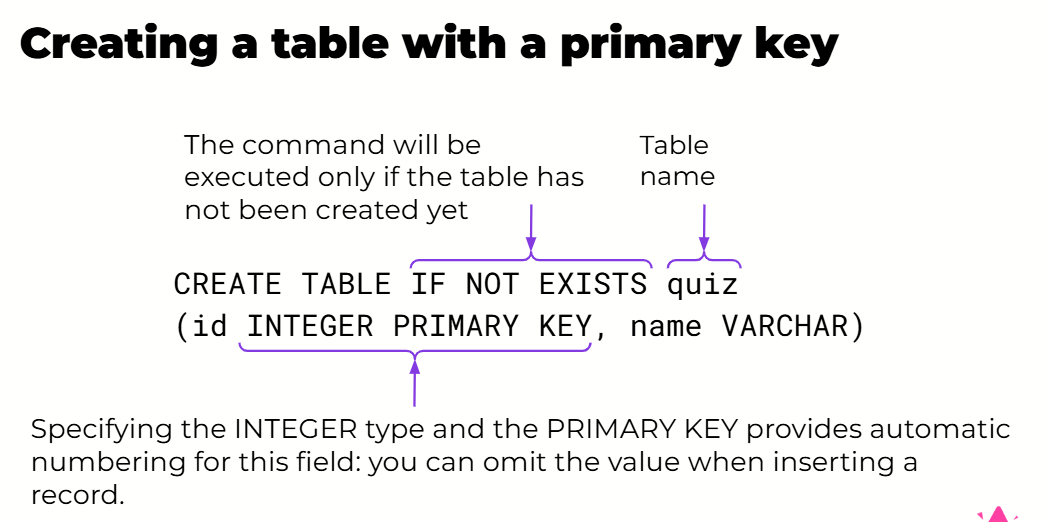



```
CREATE TABLE IF NOT EXISTS quiz
(id INTEGER PRIMARY KEY, name VARCHAR)
```



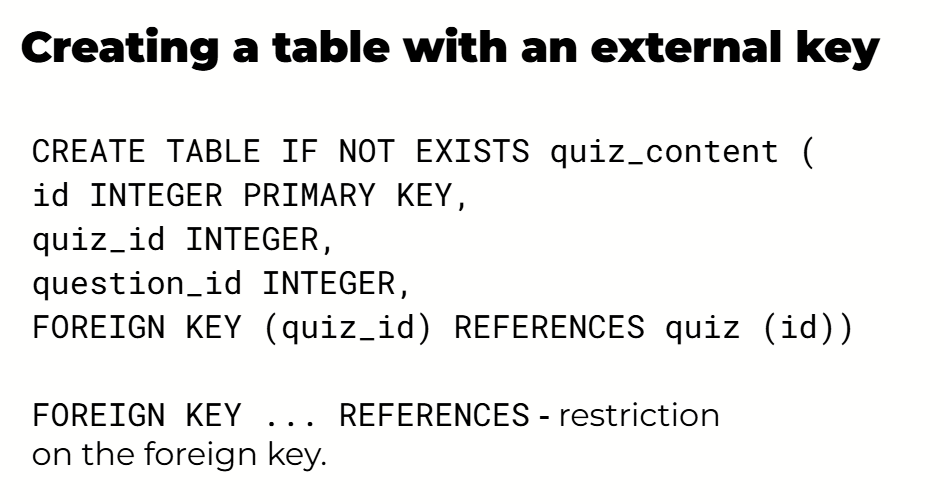



```
CREATE TABLE IF NOT EXISTS quiz_content (
id INTEGER PRIMARY KEY,
quiz_id INTEGER,
question_id INTEGER,
FOREIGN KEY (quiz_id) REFERENCES quiz (id))

```



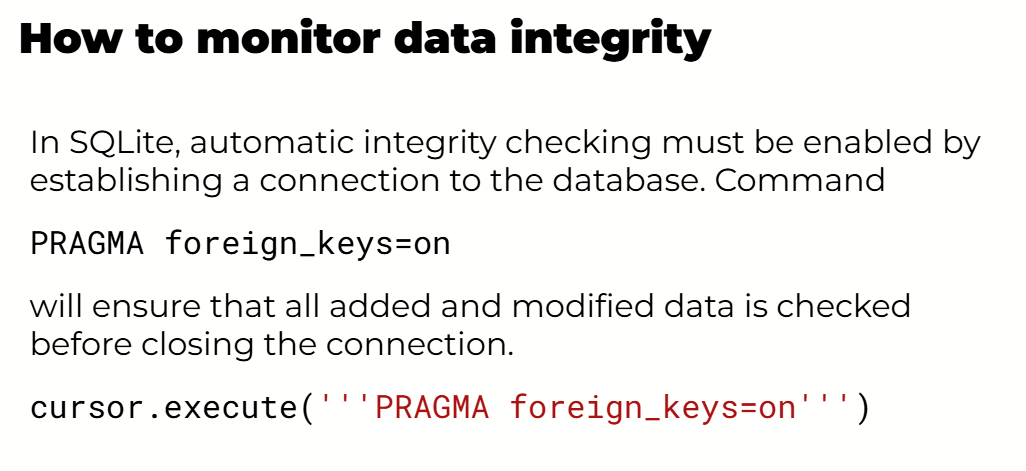



```
cursor.execute('''PRAGMA foreign_keys=on''')

```



# Filling in the database

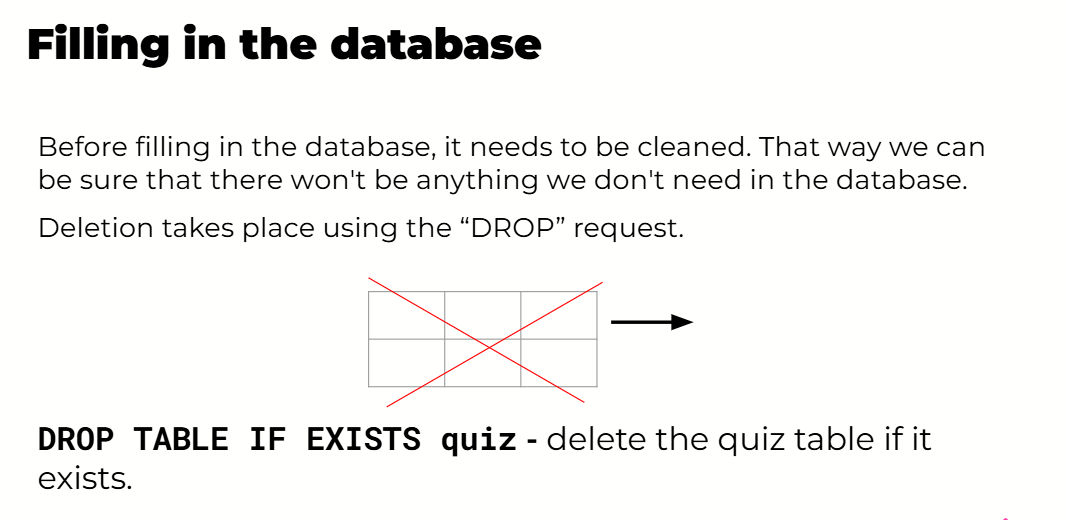



```
DROP TABLE IF EXISTS quiz
```



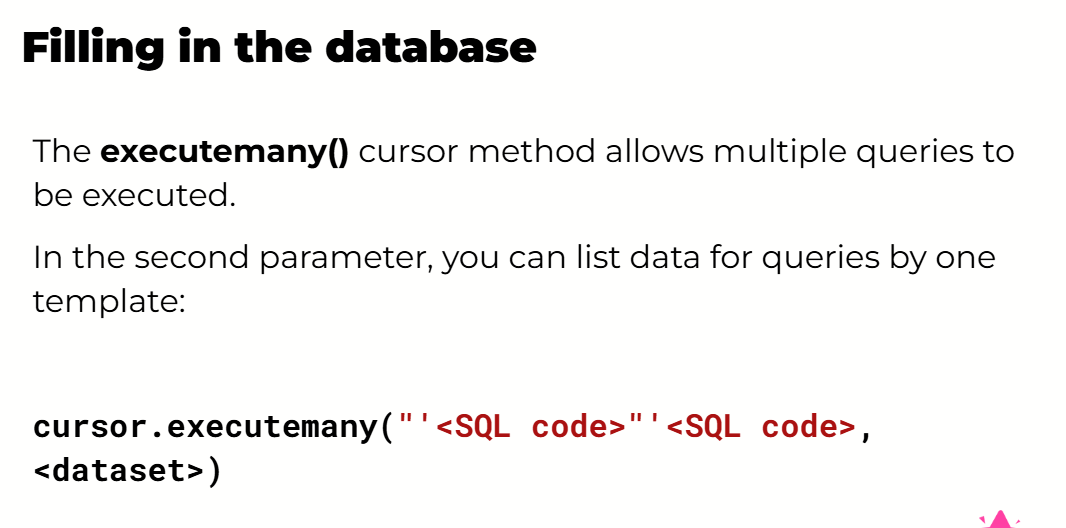



```
cursor.executemany("'<SQL code>"'<SQL code>, <dataset>)

```





```
list_q = [('How many months in a year have 28 days?',
           'All', 'One', 'None','Two'),
          ('What does the number Pi equal?',
           'Approximately 3.14', '3', '0', ' Exactly 3.14')]

cursor.execute('''PRAGMA foreign_keys=on''')
                 (question, answer, wrong1, wrong2, wrong3)
                  VALUES (?,?,?,?,?)''', list_q)

```





```
query = "INSERT INTO quiz_content (quiz_id, question_id) VALUES (?,?)"
answer = input("Add a link (y/n)?")
while answer != 'n':
   quiz_id = int(input("quiz id: "))
   question_id = int(input("question id: "))
   cursor.execute(query, [quiz_id, question_id])
   conn.commit()
   answer = input("Add a link (y/n)?")

```



# queries for related tables


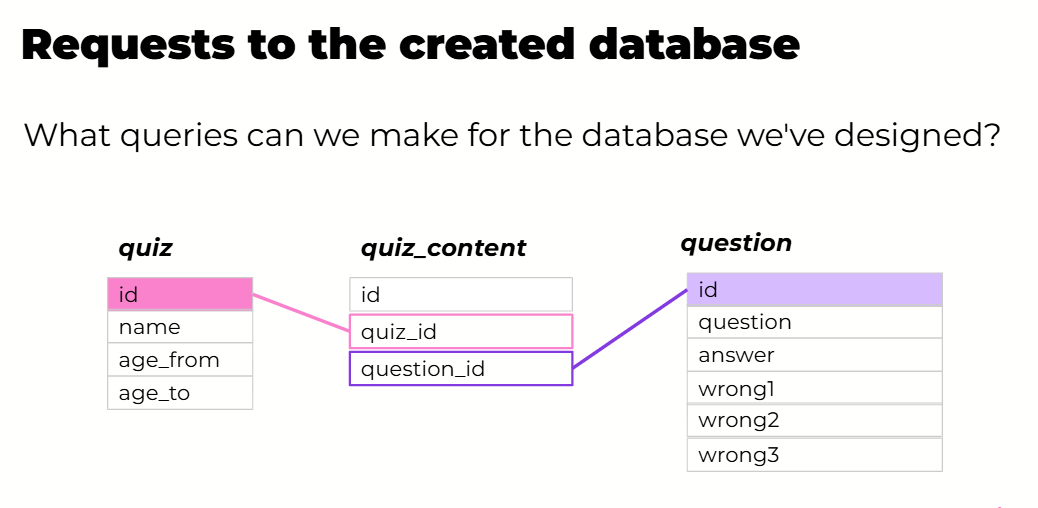

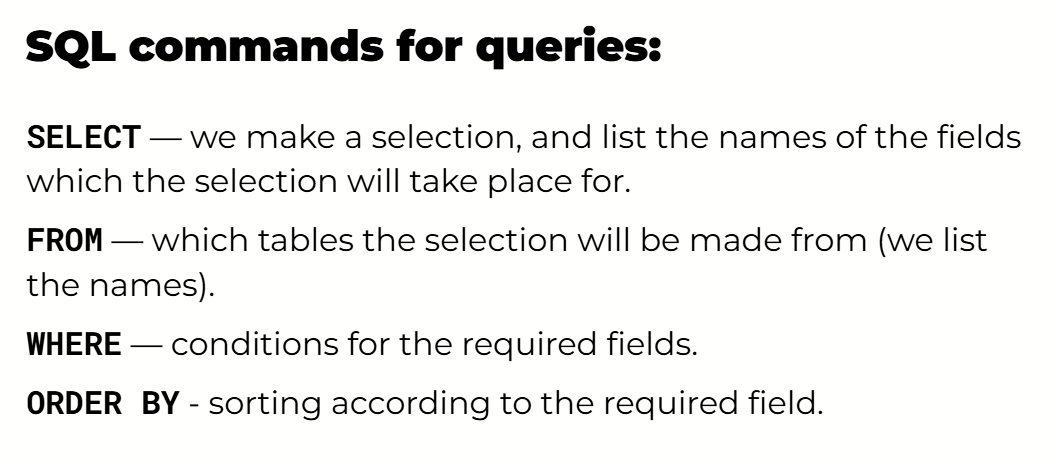

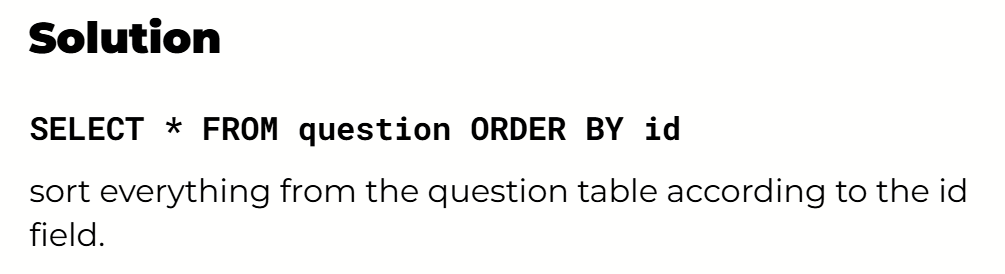



```
import sqlite3

conn = sqlite3.connect("questions.db")
cursor = conn.cursor()
cursor.execute("SELECT * FROM question ORDER BY id")
result = cursor.fetchall()
```



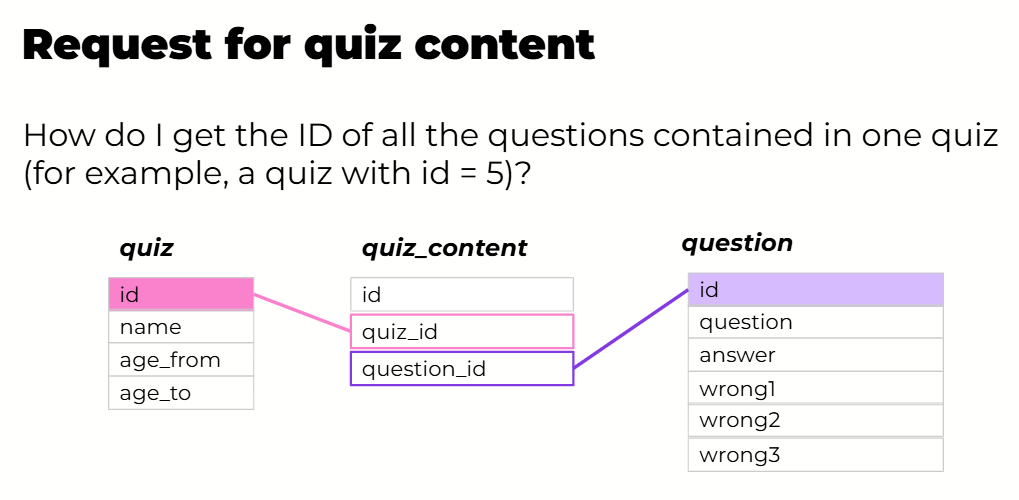



```
SELECT question_id FROM quiz_content
WHERE quiz_id = 5 ORDER BY id
```





```
SELECT quiz_content.id, question.question, question.answer FROM quiz_content, question
WHERE quiz_content.question_id == question.id
```





```
SELECT quiz_content.id, question.question, question.answer
FROM quiz_content, question
WHERE quiz_content.question_id == question.id
AND quiz_content.quiz_id == 3

```





```
SELECT quiz_content.id, question.question, question.answer
FROM quiz_content, question
WHERE quiz_content.question_id == question.id
AND quiz_content.quiz_id == 3
ORDER BY quiz_content.id

```



# Task Solutions

In [ ]:
import sqlite3
db_name = 'quiz.sqlite'
conn = None
cursor = None

def open():
    global conn, cursor
    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()

def close():
    cursor.close()
    conn.close()

def do(query):
    cursor.execute(query)
    conn.commit()

def clear_db():
    ''' deletes all tables '''
    open()
    query = '''DROP TABLE IF EXISTS quiz_content'''
    do(query)
    query = '''DROP TABLE IF EXISTS question'''
    do(query)
    query = '''DROP TABLE IF EXISTS quiz'''
    do(query)
    close()

def create():
    open()
    cursor.execute('''PRAGMA foreign_keys=on''')

    do('''CREATE TABLE IF NOT EXISTS quiz (
           id INTEGER PRIMARY KEY,
           name VARCHAR)''')

    do('''CREATE TABLE IF NOT EXISTS question (
               id INTEGER PRIMARY KEY,
               question VARCHAR,
               answer VARCHAR,
               wrong1 VARCHAR,
               wrong2 VARCHAR,
               wrong3 VARCHAR)''')

    do('''CREATE TABLE IF NOT EXISTS quiz_content (
               id INTEGER PRIMARY KEY,
               quiz_id INTEGER,
               question_id INTEGER,
               FOREIGN KEY (quiz_id) REFERENCES quiz (id),
               FOREIGN KEY (question_id) REFERENCES question (id) )''')
    close()

def add_questions():
    questions = [
        ('How many months in a year have 28 days?', 'All', 'One', 'None','Two'),
        ('What will the green cliff look like if it falls into the Red Sea?', 'Wet', 'Red', 'Will not change', 'Purple'),
        ('Which hand is better to stir tea with?', 'With a spoon', 'Right', 'Left', 'Any'),
        ('What has no length, depth, width, or height, but can be measured?', 'Time', 'Stupidity', 'The sea','Air'),
        ('When is it possible to draw out water with a net?', 'When the water is frozen', 'When there are no fish', 'When the goldfish swim away', 'When the ne breaks'),
        ('What is bigger than an elephant and weighs nothing?', 'Shadow of elephant','A balloon','A parachute', 'A cloud')
    ]
    open()
    cursor.executemany('''INSERT INTO question (question, answer, wrong1, wrong2, wrong3) VALUES (?,?,?,?,?)''', questions)
    conn.commit()
    close()

def add_quiz():
    quizes = [
        ('Own game', ),
        ('Who wants to be a millionaire?', ),
        ('The smartest', )
    ]
    open()
    cursor.executemany('''INSERT INTO quiz (name) VALUES (?)''', quizes)
    conn.commit()
    close()

def add_links():
    open()
    cursor.execute('''PRAGMA foreign_keys=on''')
    query = "INSERT INTO quiz_content (quiz_id, question_id) VALUES (?,?)"
    answer = input("Add a link (y/n)?")
    while answer != 'n':
        quiz_id = int(input("quiz id: "))
        question_id = int(input("question id: "))
        cursor.execute(query, [quiz_id, question_id])
        conn.commit()
        answer = input("Add a link (y/n)?")
    close()

def show(table):
    query = 'SELECT * FROM ' + table
    open()
    cursor.execute(query)
    print(cursor.fetchall())
    close()

def show_tables():
    show('question')
    show('quiz')
    show('quiz_content')

def get_question_after(question_id = 0, quiz_id=1):
    ''' returns the next question after the question with the passed ID
    for the first question, the default value is passed'''
    open()
    query = '''
    SELECT quiz_content.id, question.question, question.answer, question.wrong1, question.wrong2, question.wrong3
    FROM question, quiz_content
    WHERE quiz_content.question_id == question.id
    AND quiz_content.id > ? AND quiz_content.quiz_id == ?
    ORDER BY quiz_content.id '''
    cursor.execute(query, [question_id, quiz_id] )
    result = cursor.fetchone()
    close()
    return result

def main():
    clear_db()
    create()
    add_questions()
    add_quiz()
    add_links()
    show_tables()
    # Output to the console of a question with id=3, quiz id = 1
    print(get_question_after(3, 1))

if __name__ == "__main__":
    main()
